# this is an atempt to use uproot four instead of uproot3 and it worked and now i also changed the orignal DFR using uproot instread of uproot3 so this is an backup file rn

In [1]:
import uproot # For reading ROOT files, commonly used in high-energy physics.
import pandas as pd # For data manipulation and analysis.
import time # For measuring execution time or handling time-based operations.
import numpy as np # For numerical computations.
import math # For mathematical functions.
import matplotlib.pyplot as plt # For creating visualizations and plots.
import os # For file and directory operations.
import sys # For system-specific parameters and functions.
from matplotlib.ticker import AutoMinorLocator, AutoLocator # For customizing plot tick marks.
import matplotlib.ticker as ticker # Additional tools for customizing plot ticks.

import infofile # Local file containing information on cross-section, sums of weights, and dataset IDs.

#read my local file


### Step 1: Define luminosity and initialize variables
This section sets up the initial parameters and variables required for the analysis, such as luminosity and data paths.

In [2]:
lumi = 10 # Luminosity in fb^-1, a key parameter in high-energy physics analyses.

fraction = 0.03 # Fraction of the dataset to be used for training, starting with 3%.

filepath = "/Users/xin/Documents/Documents/College/Phys_392/notebooks-collection-opendata/13-TeV-examples/uproot_python/data" # Local path to the data files.



In [3]:
# The following code attempts to filter metadata for signal and background datasets.
# It uses specific keywords to identify relevant datasets for the analysis.
# Uncomment and modify as needed for your specific use case.
# df = pd.read_csv("metadata.csv")
# signal = df[df['physics_short'].str.contains("ggH125") & df['dataset_name'].str.contains("ZZ4l", case=False)]
# background = df[df['physics_short'].str.contains("ZZ4l", case=False) & ~df['dataset_name'].str.contains("H")]
# print("Signal:\n", signal)
# print("Background:\n", background)


### Attempt to retrieve metadata from CERN using ATLAS Open Data
Refer to the ATLAS Open Data documentation for more details: https://opendata.atlas.cern/docs/data/atlasopenmagic

In [4]:
# df = pd.read_csv("metadata.csv") # read the metadata file 

# print(df.head()) # print the first few rows of the metadata file



# # Filter the dataframe for 13 TeV data (assuming there's a column named 'Energy')
# df_13tev = df[df['Energy'].str.contains('13 TeV', case=False, na=False)]

# # Save the filtered result
# df_13tev.to_csv("13tev_metadata.csv", index=False)

# # Display a few rows to confirm
# print(df_13tev.head())


In [5]:
# import atlasopenmagic as atom

# # List available releases
# print(atom.available_releases())

# # Set the release (correcting the function call)
# atom.set_release('2024r-pp')

# # Fetch metadata for a specific dataset
# all_metadata = atom.get_metadata('301215')

# # Print the metadata to verify
# print(all_metadata)

In [6]:
import uproot
import pandas as pd

def read_root_to_df(path, tree_name="CollectionTree", branches=None):
    f    = uproot.open(path)
    tree = f[tree_name]

    # if branches is None, reads all branches
    if branches is None:
        return tree.arrays(library="pd")
    else:
        return tree.arrays(branches, library="pd")


In [7]:
import os
print(os.getcwd())

/Users/xin/Documents/Documents/College/Phys_392/higgs_lovers


In [8]:
import os

# Ensure relative paths are correctly set
base_dir = os.getcwd()
signal_path = os.path.join(base_dir, "data/DAOD_PHYSLITE.38191712._000001.pool.root.1")
background_path = os.path.join(base_dir, "data/DAOD_PHYSLITE.37110937._000011.pool.root.1")


In [9]:
tree_name = "CollectionTree"   # change if your tree has a different label

branches = [
    "lep_charge",
    "lep_type",
    "lep_pt",
    "mcWeight",
    "scaleFactor_PILEUP",
    "scaleFactor_ELE",
    "scaleFactor_MUON",
    "scaleFactor_LepTRIGGER"
]


checks

In [10]:
import os

print(os.path.isfile(signal_path))  # should return True
print(signal_path.endswith(".root.1"))  # should also return True


True
True


In [11]:


# open the file
f = uproot.open(signal_path)

# print everything at the root level
print(f.keys())


['##Params;3', '##Params;2', '##Shapes;3', '##Shapes;2', '##Links;3', '##Links;2', 'MetaData;1', 'MetaDataHdr;1', 'MetaDataHdrForm;1', 'CollectionTree;1', 'POOLContainer;1', 'POOLContainerForm;1', 'POOLCollectionTree;1']


In [13]:
f = uproot.open(signal_path)
branches = f["CollectionTree"].keys()
# decode bytes to strings
branch_names = [b.rstrip(";1") for b in branches]
print("\n".join(branch_names))


xTrigDecisionAux.
xTrigDecisionAux./xTrigDecisionAux.xAOD::AuxInfoBase
xTrigDecisionAux./xTrigDecisionAux.smk
xTrigDecisionAux./xTrigDecisionAux.bgCode
xTrigDecisionAux./xTrigDecisionAux.tav
xTrigDecisionAux./xTrigDecisionAux.tap
xTrigDecisionAux./xTrigDecisionAux.tbp
xTrigDecisionAux./xTrigDecisionAux.lvl2ErrorBits
xTrigDecisionAux./xTrigDecisionAux.efErrorBits
xTrigDecisionAux./xTrigDecisionAux.lvl2Truncated
xTrigDecisionAux./xTrigDecisionAux.efTruncated
xTrigDecisionAux./xTrigDecisionAux.lvl2PassedPhysics
xTrigDecisionAux./xTrigDecisionAux.efPassedPhysics
xTrigDecisionAux./xTrigDecisionAux.lvl2PassedRaw
xTrigDecisionAux./xTrigDecisionAux.efPassedRaw
xTrigDecisionAux./xTrigDecisionAux.lvl2PassedThrough
xTrigDecisionAux./xTrigDecisionAux.efPassedThrough
xTrigDecisionAux./xTrigDecisionAux.lvl2Prescaled
xTrigDecisionAux./xTrigDecisionAux.efPrescaled
xTrigDecisionAux./xTrigDecisionAux.lvl2Resurrected
xTrigDecisionAux./xTrigDecisionAux.efResurrected
METAssoc_AnalysisMETAux.
METAssoc_Analy

In [15]:
# sig_df = read_root_to_df(signal_path,     tree_name, branches)
# bkg_df = read_root_to_df(background_path, tree_name, branches)


In [17]:
import uproot
import awkward as ak
import pandas as pd

def make_mini_df(path, is_signal):
    # 1) Open the tree
    tree = uproot.open(path)["CollectionTree"]
    
    # 2) Read branches into awkward arrays
    arr = tree.arrays([
        "AnalysisElectronsAuxDyn.pt",
        "AnalysisElectronsAuxDyn.charge",
        "AnalysisMuonsAuxDyn.pt",
        "AnalysisMuonsAuxDyn.charge",
        "EventInfoAuxDyn.mcEventWeights",
        "EventInfoAuxDyn.PileupWeight_NOSYS",
    ], library="ak")
    
    # 3) Separate electrons and muons
    ele_pt     = arr["AnalysisElectronsAuxDyn.pt"]
    ele_charge = arr["AnalysisElectronsAuxDyn.charge"]
    mu_pt      = arr["AnalysisMuonsAuxDyn.pt"]
    mu_charge  = arr["AnalysisMuonsAuxDyn.charge"]
    
    # 4) Concatenate into one [n_events, n_leptons] array
    lep_pt     = ak.concatenate([ele_pt,     mu_pt],     axis=1)
    lep_charge = ak.concatenate([ele_charge, mu_charge], axis=1)
    # make a type array: 11 for electrons, 13 for muons
    lep_type   = ak.concatenate([
                    ak.full_like(ele_pt, 11),
                    ak.full_like(mu_pt, 13)
                 ], axis=1)
    
    # 5) Keep only events with at least 4 leptons
    mask       = ak.num(lep_pt) >= 4
    lep_pt     = lep_pt[mask]
    lep_charge = lep_charge[mask]
    lep_type   = lep_type[mask]
    
    # 6) Build your event weight
    #    mcEventWeights is an array of [nominal, systUp, systDown, …]
    mc_w       = arr["EventInfoAuxDyn.mcEventWeights"][mask][:, 0]
    pu_w       = arr["EventInfoAuxDyn.PileupWeight_NOSYS"][mask]
    total_w    = mc_w * pu_w
    
    # 7) Pull out the *first* four leptons into flat columns
    df = pd.DataFrame({
        "lep_pt_1":     lep_pt[:, 0],
        "lep_pt_2":     lep_pt[:, 1],
        "lep_pt_3":     lep_pt[:, 2],
        "lep_pt_4":     lep_pt[:, 3],
        "lep_charge_1": lep_charge[:, 0],
        "lep_charge_2": lep_charge[:, 1],
        "lep_charge_3": lep_charge[:, 2],
        "lep_charge_4": lep_charge[:, 3],
        "lep_type_1":   lep_type[:, 0],
        "lep_type_2":   lep_type[:, 1],
        "lep_type_3":   lep_type[:, 2],
        "lep_type_4":   lep_type[:, 3],
        "totalWeight":  total_w,
        "isSignal":     is_signal,
    })
    
    return df

# —————————————————————————
# 8) Load your two files:

sig_df = make_mini_df(signal_path, is_signal=1)
bkg_df = make_mini_df(background_path, is_signal=0)

# 9) Combine them into one DataFrame
df = pd.concat([sig_df, bkg_df], ignore_index=True)

print(df.shape)      # (n_events, 16 columns)
print(df.head())


(58752, 14)
       lep_pt_1      lep_pt_2      lep_pt_3      lep_pt_4  lep_charge_1  \
0  43576.542969  31564.498047  18570.957031   3926.806396          -1.0   
1  49105.503906  32389.763672  18265.132812  11413.677734           1.0   
2  88467.992188  44106.078125  40260.042969  36732.554688           1.0   
3   4976.000488   2760.722900  18140.425781  45471.558594           1.0   
4  43414.191406  22627.574219  13650.976562   8180.861328           1.0   

   lep_charge_2  lep_charge_3  lep_charge_4  lep_type_1  lep_type_2  \
0           1.0           1.0          -1.0        11.0        11.0   
1          -1.0           1.0          -1.0        13.0        13.0   
2          -1.0           1.0          -1.0        11.0        11.0   
3           1.0           1.0           1.0        11.0        11.0   
4          -1.0           1.0          -1.0        11.0        11.0   

   lep_type_3  lep_type_4  totalWeight  isSignal  
0        11.0        11.0    30.488991         1  
1       

In [18]:
#convert pt from MeV to GeV
for i in (1,2,3,4):
    df[f"lep_pt_{i}"] /= 1000


In [19]:
#2)applying the cut a) cahrge sum has to be 0
mask_charge = (
    df.lep_charge_1 +
    df.lep_charge_2 +
    df.lep_charge_3 +
    df.lep_charge_4
) == 0

df = df[mask_charge]

#b)flacour paring
valid_types = {44, 48, 52}  # 11+11+11+11, 13×4, or 11+11+13+13 etc.
sum_types = (
    df.lep_type_1 +
    df.lep_type_2 +
    df.lep_type_3 +
    df.lep_type_4
)

df = df[ sum_types.isin(valid_types) ]



In [20]:
# 3) Pick *all* your features automatically
#    i.e. every column except 'totalWeight' and 'isSignal'

features = [c for c in df.columns if c not in ("totalWeight", "isSignal")]
print("Features being used:", features)

X = df[features].values    # shape (n_events, 12)
y = df["isSignal"].values  # shape (n_events,)
w = df["totalWeight"].values

print("X shape:", X.shape)


Features being used: ['lep_pt_1', 'lep_pt_2', 'lep_pt_3', 'lep_pt_4', 'lep_charge_1', 'lep_charge_2', 'lep_charge_3', 'lep_charge_4', 'lep_type_1', 'lep_type_2', 'lep_type_3', 'lep_type_4']
X shape: (43937, 12)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing    import StandardScaler

X_train, X_test, y_train, y_test, w_train, w_test = train_test_split(
    X, y, w,
    test_size=0.33,
    random_state=42,
    stratify=y
)

scaler    = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)


In [22]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation="relu",
    solver="adam",
    max_iter=500,
    verbose=True
)

mlp.fit(X_train_s, y_train)


Iteration 1, loss = 0.65919348
Iteration 2, loss = 0.60859684
Iteration 3, loss = 0.55767753
Iteration 4, loss = 0.54037829
Iteration 5, loss = 0.52922153
Iteration 6, loss = 0.51923055
Iteration 7, loss = 0.51046074
Iteration 8, loss = 0.50347283
Iteration 9, loss = 0.49793431
Iteration 10, loss = 0.49463404
Iteration 6, loss = 0.51923055
Iteration 7, loss = 0.51046074
Iteration 8, loss = 0.50347283
Iteration 9, loss = 0.49793431
Iteration 10, loss = 0.49463404
Iteration 11, loss = 0.49131174
Iteration 12, loss = 0.48970800
Iteration 13, loss = 0.48716883
Iteration 11, loss = 0.49131174
Iteration 12, loss = 0.48970800
Iteration 13, loss = 0.48716883
Iteration 14, loss = 0.48614750
Iteration 15, loss = 0.48423249
Iteration 16, loss = 0.48275619
Iteration 17, loss = 0.48207057
Iteration 18, loss = 0.48097849
Iteration 19, loss = 0.47989711
Iteration 14, loss = 0.48614750
Iteration 15, loss = 0.48423249
Iteration 16, loss = 0.48275619
Iteration 17, loss = 0.48207057
Iteration 18, loss = 

MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=500, verbose=True)

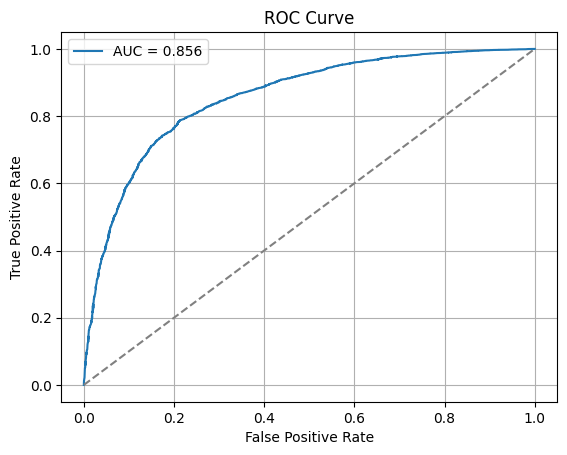

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# # 1) get predicted signal probabilities
# y_prob = mlp.predict_proba(X_test_s)[:, 1]

# # 2) compute the ROC points (with your test weights)
# fpr, tpr, _ = roc_curve(y_test, y_prob, sample_weight=w_test)

# # 3) compute AUC in one go (this accepts sample_weight)
# roc_auc = roc_auc_score(y_test, y_prob, sample_weight=w_test)

import numpy as np
from sklearn.metrics import auc

# Compute the ROC points (with your test weights)
fpr, tpr, _ = roc_curve(y_test, mlp.predict_proba(X_test_s)[:, 1], sample_weight=w_test)

# find the first occurrence of each unique fpr
_, unique_idxs = np.unique(fpr, return_index=True)

# grab only those unique points (in order!)
fpr_u = fpr[unique_idxs]
tpr_u = tpr[unique_idxs]

roc_auc = auc(fpr_u, tpr_u)

# then plot as before
plt.plot(fpr_u, tpr_u, label=f"AUC = {roc_auc:.3f}")



# 4) plot

plt.plot([0,1], [0,1], "--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


In [26]:
# import numpy as np

# # Compute sampling probabilities proportional to w_train
# p = w_train / np.sum(w_train)

# # Draw N_train samples with replacement
# idx = np.random.choice(len(w_train), size=len(w_train), p=p)

# X_resampled = X_train_s[idx]
# y_resampled = y_train[idx]

# # Retrain on this weighted bootstrap sample
# mlp = MLPClassifier(
#     hidden_layer_sizes=(50, 25),
#     activation="relu",
#     solver="adam",
#     max_iter=500,
#     verbose=True
# )
# mlp.fit(X_resampled, y_resampled)


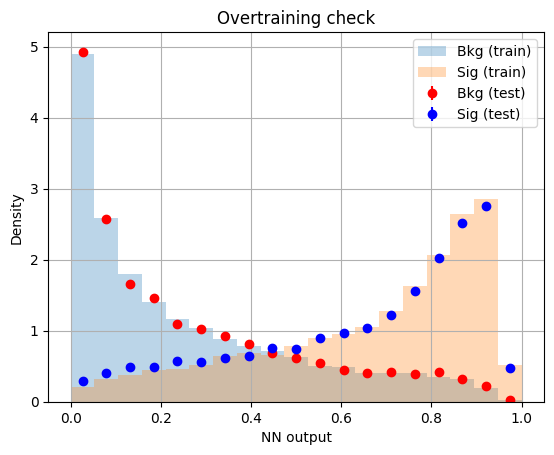

In [27]:
#checking uoverfitting
import numpy as np
import matplotlib.pyplot as plt

# Get the NN score on train & test
y_prob_train = mlp.predict_proba(X_train_s)[:,1]
y_prob_test  = mlp.predict_proba(X_test_s )[:,1]

# Separate signal & background in each
sig_train = y_prob_train[y_train==1]
bkg_train = y_prob_train[y_train==0]
sig_test  = y_prob_test [y_test ==1]
bkg_test  = y_prob_test [y_test ==0]

# Plot filled histograms + error bars
bins = np.linspace(0,1,20)
plt.hist(bkg_train, bins=bins, histtype="stepfilled", alpha=0.3, density=True, label="Bkg (train)")
plt.hist(sig_train, bins=bins, histtype="stepfilled", alpha=0.3, density=True, label="Sig (train)")
# test as points with Poisson errors
for arr, col, lab in [(bkg_test,"red","Bkg (test)"), (sig_test,"blue","Sig (test)")]:
    hist, edges = np.histogram(arr, bins=bins, density=True)
    centers = 0.5*(edges[:-1]+edges[1:])
    errs    = np.sqrt(hist * len(arr)) / len(arr)
    plt.errorbar(centers, hist, yerr=errs, fmt="o", color=col, label=lab)

plt.xlabel("NN output"); plt.ylabel("Density")
plt.legend(); plt.grid()
plt.title("Overtraining check")
plt.show()


/Users/xin/Documents/Documents/College/Phys_392/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


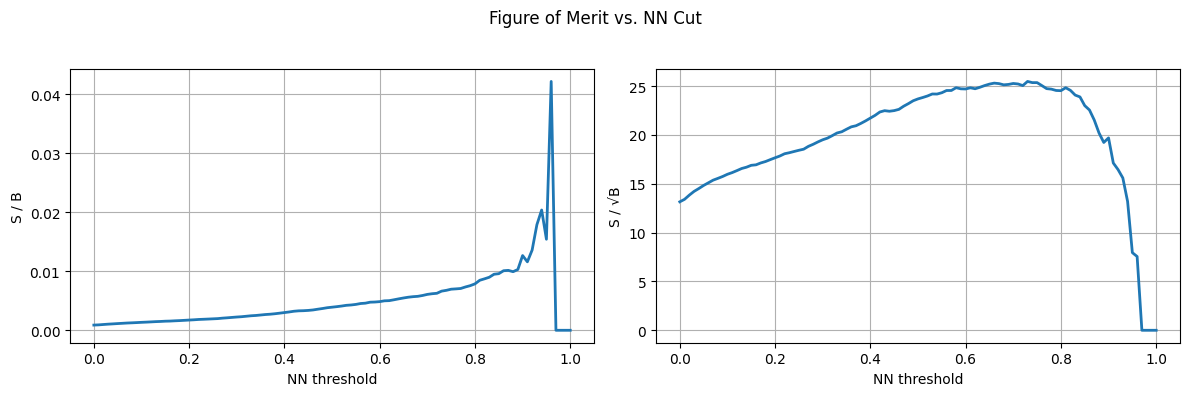

→ Best NN threshold (max S/√B): 0.730
Kept 12431 / 43937 events (28.3%)


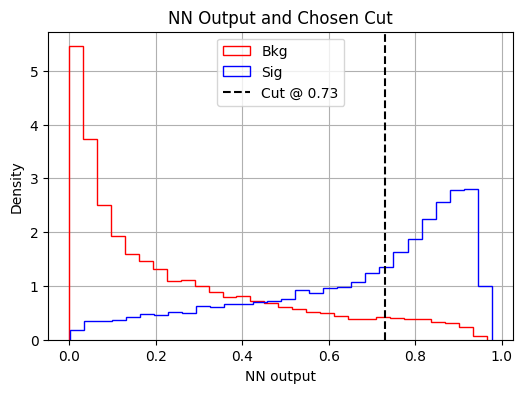

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# — assume these exist from your earlier steps —
# mlp            : trained MLPClassifier
# scaler         : StandardScaler fit on X_train
# features       : list of column names used as inputs
# df             : full pandas DataFrame with those columns + totalWeight + isSignal
# y_test, w_test : arrays for your test split
# X_test_s       : scaled test features
# y_prob         : NN scores on test (if not defined, compute now)

# 0) (Re)compute NN output on test and full df
y_prob = mlp.predict_proba(X_test_s)[:, 1]
df["NN_output"] = mlp.predict_proba(scaler.transform(df[features]))[:, 1]

# 1) scan thresholds
ths = np.linspace(0, 1, 101)
S_over_B     = []
S_over_sqrtB = []

for t in ths:
    mask = (y_prob > t)
    S = np.sum(w_test[(y_test == 1) & mask])
    B = np.sum(w_test[(y_test == 0) & mask])
    if B>0:
        S_over_B.append(S / B)
        S_over_sqrtB.append(S / np.sqrt(B))
    else:
        S_over_B.append(0)
        S_over_sqrtB.append(0)

# 2) plot S/B and S/√B vs threshold
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.plot(ths, S_over_B,   lw=2)
ax1.set_xlabel("NN threshold"); ax1.set_ylabel("S / B")
ax1.grid()

ax2.plot(ths, S_over_sqrtB, lw=2)
ax2.set_xlabel("NN threshold"); ax2.set_ylabel("S / √B")
ax2.grid()

plt.suptitle("Figure of Merit vs. NN Cut")
plt.tight_layout(rect=[0,0,1,0.95])
plt.show()

# 3) choose best threshold (max S/√B)
best_idx = int(np.argmax(S_over_sqrtB))
best_t   = ths[best_idx]
print(f"→ Best NN threshold (max S/√B): {best_t:.3f}")

# 4) apply to full DataFrame
df_sel = df[df.NN_output > best_t]
print(f"Kept {len(df_sel)} / {len(df)} events "
      f"({100*len(df_sel)/len(df):.1f}%)")

# 5) plot NN‐output distribution with cut
plt.figure(figsize=(6,4))
# background
plt.hist(df[df.isSignal==0].NN_output,
         bins=30, density=True, histtype="step", label="Bkg", color="red")
# signal
plt.hist(df[df.isSignal==1].NN_output,
         bins=30, density=True, histtype="step", label="Sig", color="blue")
plt.axvline(best_t, color="black", linestyle="--",
            label=f"Cut @ {best_t:.2f}")
plt.xlabel("NN output"); plt.ylabel("Density")
plt.title("NN Output and Chosen Cut")
plt.legend(); plt.grid()
plt.show()


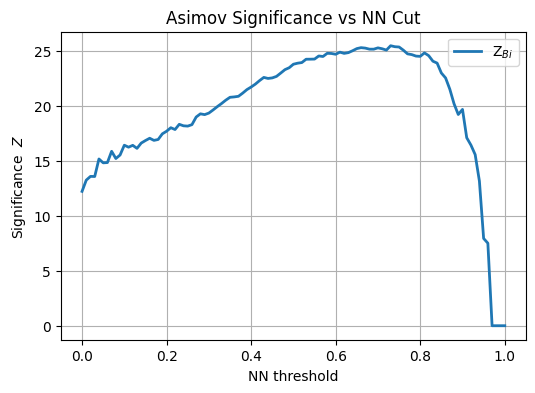

→ Best threshold = 0.730, giving Z = 25.435 σ
Selected 12431 / 43937 events (28.3%)


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Define the Z_bi function
def Z_bi(S, B):
    # avoid division-by-zero
    return np.sqrt(2 * ((S + B) * np.log(1 + S/B) - S)) if B>0 else 0.

# 2) Scan NN thresholds
ths = np.linspace(0, 1, 101)
Z_vals = []

for t in ths:
    mask = (y_prob > t)
    S = np.sum(w_test[(y_test == 1) & mask])   # weighted signal
    B = np.sum(w_test[(y_test == 0) & mask])   # weighted background
    Z_vals.append(Z_bi(S, B))

# 3) Plot significance vs threshold
plt.figure(figsize=(6,4))
plt.plot(ths, Z_vals, lw=2, label="Z$_{Bi}$")
plt.xlabel("NN threshold")
plt.ylabel("Significance  $Z$")
plt.title("Asimov Significance vs NN Cut")
plt.grid()
plt.legend()
plt.show()

# 4) Pick the best operating point
best = np.argmax(Z_vals)
best_t = ths[best]
best_Z = Z_vals[best]
print(f"→ Best threshold = {best_t:.3f}, giving Z = {best_Z:.3f} σ")

# 5) If you like, apply it to your full df:
df_sel = df[df.NN_output > best_t]
print(f"Selected {len(df_sel)} / {len(df)} events ({100*len(df_sel)/len(df):.1f}%)")


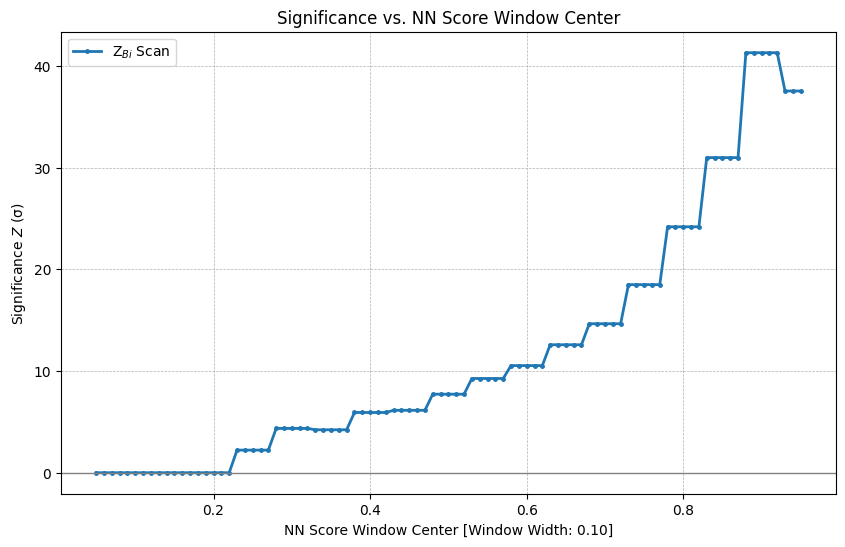

→ Best NN Score Window Center = 0.880
  Optimal NN Score Window: [0.830, 0.930]
  Calculated Significance Z = 41.293 σ
  Events in optimal NN score window: Data (S+B est.) = 15356641.00, Background (est.) = 15195456.00, Signal (est.) = 161184.84


In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 1) Define Z_bi function (Poonen-Bi formula for significance)
def Z_bi(S, B):
    # S: Number of signal events
    # B: Number of background events
    if B <= 0:
        # If B is zero (or negative, though unlikely for counts), significance can be problematic.
        # If S > 0 and B = 0, significance is theoretically infinite.
        # For plotting or practical purposes, might return a large number or handle as special case.
        # Here, returning S if B=0 and S>0 (approx for Poisson S events, 0 bkg), or 0 if S=0.
        return S if S > 0 else 0.0 
    if S < 0: # Signal count should not be negative for this formula
        S = 0.0 # Treat as no signal if data is below background
    val_inside_log = 1 + S / B
    term1 = (S + B) * np.log(val_inside_log)
    # Ensure the argument of sqrt is non-negative due to potential floating point inaccuracies
    sqrt_arg = 2 * (term1 - S)
    return np.sqrt(max(0, sqrt_arg))

# Ensure df DataFrame is available and has the required columns
if 'df' not in globals() or not all(col in df.columns for col in ['NN_output', 'isSignal', 'totalWeight']):
    print("Error: 'df' DataFrame with 'NN_output', 'isSignal', and 'totalWeight' columns not defined. \nPlease ensure the preceding cells that define and populate 'df' have been run.")
else:
    # Define histogramming parameters for NN output
    nn_bin_edges = np.linspace(0, 1, 21) # 20 bins for NN score from 0 to 1
    bin_centres_nn = (nn_bin_edges[:-1] + nn_bin_edges[1:]) / 2 # Renamed to avoid conflict if other bin_centres exist

    # Create weighted histograms for NN output
    # Background events
    background_hist_nn, _ = np.histogram(
        df[df['isSignal'] == 0]['NN_output'],
        bins=nn_bin_edges,
        weights=df[df['isSignal'] == 0]['totalWeight'],
        density=False # Use event counts, not density for S and B
    )
    # Signal events
    signal_hist_nn, _ = np.histogram(
        df[df['isSignal'] == 1]['NN_output'],
        bins=nn_bin_edges,
        weights=df[df['isSignal'] == 1]['totalWeight'],
        density=False # Use event counts, not density for S and B
    )

    # 'data_x_nn' is the sum of signal and background histograms (total "observed" events in NN score bins)
    data_x_nn = background_hist_nn + signal_hist_nn
    # 'background_nn_scan' is the background histogram for the scan
    background_nn_scan = background_hist_nn

    # 2) Scan NN Score window centers
    window_width_nn = 0.1  # Width of the NN score window (e.g., 0.1 means a window of 10% of NN score range)
    # Scan NN score window centers, e.g., from (window_width_nn/2) to 1-(window_width_nn/2)
    # Step size for window center scan, e.g., 0.01
    scan_step_nn = 0.01 
    num_steps = int((1 - window_width_nn) / scan_step_nn) + 1
    nn_score_centers_scan = np.linspace(window_width_nn / 2, 1 - (window_width_nn / 2), num_steps)

    Z_vals = []

    for nn_center in nn_score_centers_scan:
        window_low = nn_center - window_width_nn / 2
        window_high = nn_center + window_width_nn / 2
        
        # Create a mask for bins whose centers fall within the current NN score window
        # Ensure bin_centres_nn is used here
        window_mask = (bin_centres_nn >= window_low) & (bin_centres_nn < window_high) # Use < for high to avoid double counting bin edges
        
        if not np.any(window_mask): # If no bin centers fall into this window
            Z_vals.append(0.0)
            continue

        # Sum S and B from the *histograms* within the window_mask
        S_calc = np.sum(signal_hist_nn[window_mask]) # Signal events in window
        B_calc = np.sum(background_hist_nn[window_mask]) # Background events in window
        
        Z_vals.append(Z_bi(S_calc, B_calc))

    # 3) Plot significance vs NN score window center
    plt.figure(figsize=(10, 6))
    plt.plot(nn_score_centers_scan, Z_vals, lw=2, marker='.', markersize=5, label="Z$_{Bi}$ Scan")
    plt.xlabel(f"NN Score Window Center [Window Width: {window_width_nn:.2f}]")
    plt.ylabel("Significance $Z$ (σ)")
    plt.title("Significance vs. NN Score Window Center")
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.axhline(0, color='grey', lw=1) # Add a line at Z=0 for reference
    plt.legend()
    plt.show()

    # 4) Pick the best operating point (NN score window center)
    if Z_vals and np.any(np.nan_to_num(Z_vals) > 0): # Check if Z_vals is not empty and contains non-zero/non-NaN positive values
        best_idx = np.nanargmax(Z_vals) # Use nanargmax to handle potential NaNs if B=0 and S=0
        best_nn_center = nn_score_centers_scan[best_idx]
        best_Z = Z_vals[best_idx]
        
        best_window_low = best_nn_center - window_width_nn / 2
        best_window_high = best_nn_center + window_width_nn / 2
        
        print(f"→ Best NN Score Window Center = {best_nn_center:.3f}")
        print(f"  Optimal NN Score Window: [{best_window_low:.3f}, {best_window_high:.3f}]")
        print(f"  Calculated Significance Z = {best_Z:.3f} σ")

        # 5) Report event counts for the best window
        best_window_mask = (bin_centres_nn >= best_window_low) & (bin_centres_nn < best_window_high)
        if np.any(best_window_mask):
           S_best = np.sum(signal_hist_nn[best_window_mask])
           B_best = np.sum(background_hist_nn[best_window_mask])
           N_data_best_window = S_best + B_best # Total data is S+B from histograms
           print(f"  Events in optimal NN score window: Data (S+B est.) = {N_data_best_window:.2f}, Background (est.) = {B_best:.2f}, Signal (est.) = {S_best:.2f}")
        else:
           print("  No bins found in the optimal NN score window (this should not happen if Z_vals were calculated properly).")
    else:
        print("Could not determine best operating point. Z_vals might be empty, all zeros, or contain NaNs.")
